In [3]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.4 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 19.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138888 sha256=ef9783701895c077b124d6f198eeb991832706b20d60516528706d2793d84cff
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/dd/16/8f/bdde4dfda69996dc9e226111ccfd4a4d247cb61b42a237c3cc
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully un

# Import libraries

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Question 1: Extracting Tesla Stock Data

In [5]:
tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="1y")
tesla_stock_data.reset_index(inplace=True)

# Display the first few rows
tesla_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-09-20 00:00:00-04:00,267.040009,273.929993,262.459991,262.589996,122514600,0.0,0.0
1,2023-09-21 00:00:00-04:00,257.850006,260.859985,254.210007,255.699997,119531000,0.0,0.0
2,2023-09-22 00:00:00-04:00,257.399994,257.790009,244.479996,244.880005,127524100,0.0,0.0
3,2023-09-25 00:00:00-04:00,243.380005,247.100006,238.309998,246.990005,104636600,0.0,0.0
4,2023-09-26 00:00:00-04:00,242.979996,249.550003,241.660004,244.119995,101993600,0.0,0.0


# Question 2: Extracting Tesla Revenue Data

In [7]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extracting the revenue data
revenue_data = []
for row in soup.find_all('tr')[1:]:  # Skipping the header
    cols = row.find_all('td')
    revenue_data.append((cols[0].text, cols[1].text))

tesla_revenue_df = pd.DataFrame(revenue_data, columns=["Year", "Revenue"])
tesla_revenue_df.head()

,Year,Revenue


# Question 3: Extracting GameStop Stock Data

In [8]:
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="1y")
gamestop_stock_data.reset_index(inplace=True)

# Display the first few rows
gamestop_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-09-20 00:00:00-04:00,17.629999,17.930000,17.450001,17.520000,2129800,0.0,0.0
1,2023-09-21 00:00:00-04:00,17.280001,17.320000,16.650000,17.020000,2910700,0.0,0.0
2,2023-09-22 00:00:00-04:00,17.180000,17.350000,17.000000,17.180000,2100300,0.0,0.0
3,2023-09-25 00:00:00-04:00,17.000000,17.719999,16.850000,17.670000,2181200,0.0,0.0
4,2023-09-26 00:00:00-04:00,17.379999,17.820000,16.780001,16.780001,2726800,0.0,0.0


# Question 4: Extracting GameStop Revenue Data

In [9]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/revenue"
response_gme = requests.get(url_gme)
soup_gme = BeautifulSoup(response_gme.content, 'html.parser')

# Extracting the revenue data
revenue_data_gme = []
for row in soup_gme.find_all('tr')[1:]:  # Skipping the header
    cols = row.find_all('td')
    revenue_data_gme.append((cols[0].text, cols[1].text))

gamestop_revenue_df = pd.DataFrame(revenue_data_gme, columns=["Year", "Revenue"])
gamestop_revenue_df.head()

,Year,Revenue


# Question 5: Tesla Stock and Revenue Dashboard

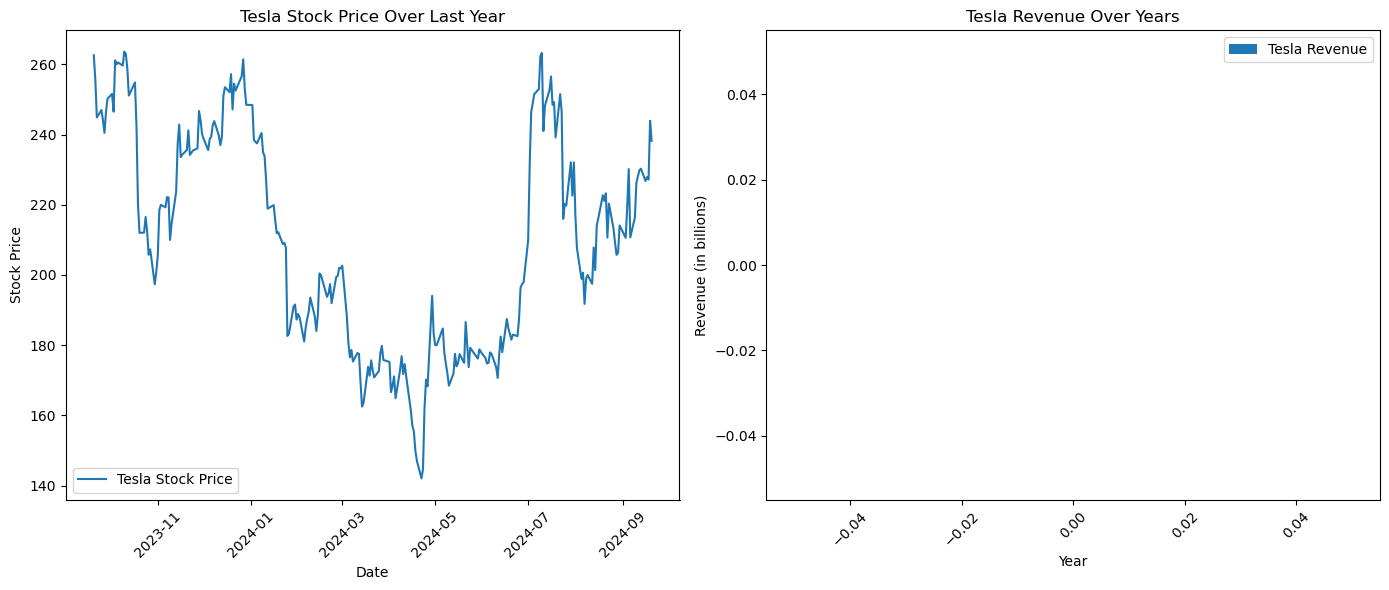

In [10]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(tesla_stock_data['Date'], tesla_stock_data['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price Over Last Year')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(tesla_revenue_df['Year'], tesla_revenue_df['Revenue'].astype(float), label='Tesla Revenue')
plt.title('Tesla Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue (in billions)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Question 6: GameStop Stock and Revenue Dashboard

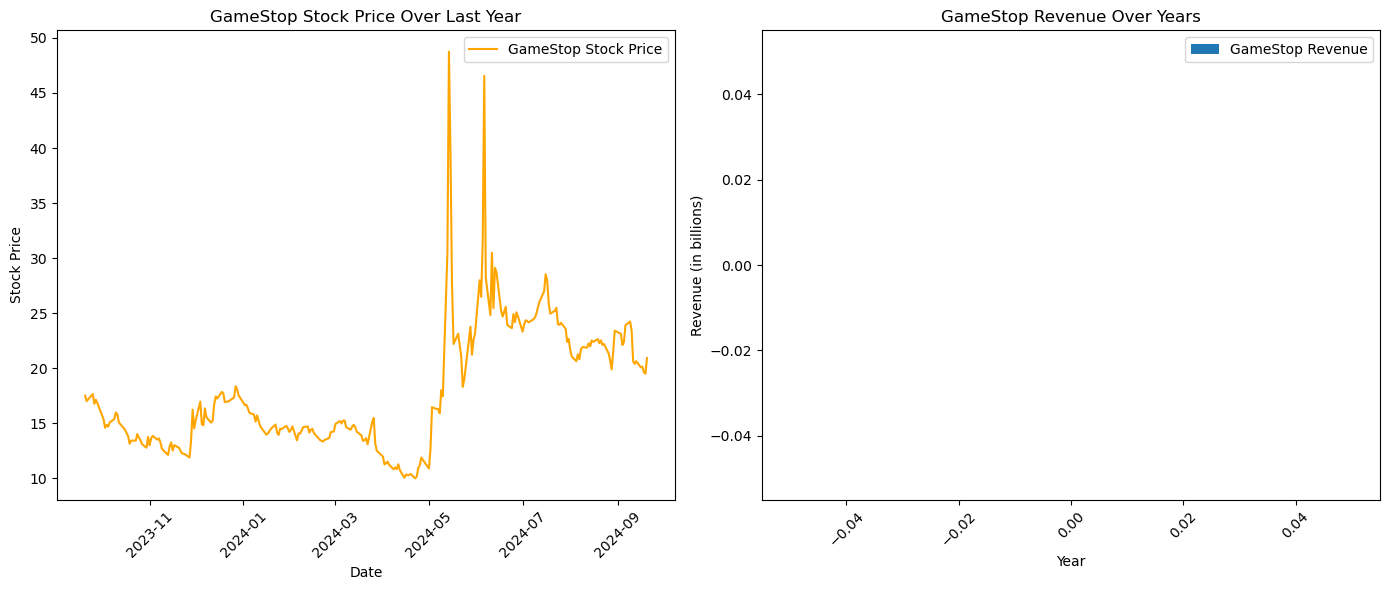

In [11]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(gamestop_stock_data['Date'], gamestop_stock_data['Close'], label='GameStop Stock Price', color='orange')
plt.title('GameStop Stock Price Over Last Year')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(gamestop_revenue_df['Year'], gamestop_revenue_df['Revenue'].astype(float), label='GameStop Revenue', color='orange')
plt.title('GameStop Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue (in billions)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()